Mounted at /content/drive
Found 402 images belonging to 2 classes.
Found 100 images belonging to 2 classes.

 TRAINING : InceptionV3 MODEL

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

 PHASE 1 : Training Only Top Layers



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5769 - loss: 0.7823
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to /content/drive/MyDrive/models/InceptionV3/model_inceptionv3.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step - accuracy: 0.5796 - loss: 0.7787 - val_accuracy: 0.7500 - val_loss: 0.4725
Epoch 2/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7916 - loss: 0.4184
Epoch 2: val_accuracy improved from 0.75000 to 0.88000, saving model to /content/drive/MyDrive/models/InceptionV3/model_inceptionv3.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.7929 - loss: 0.4180 - val_accuracy: 0.8800 - val_loss: 0.3333
Epoch 3/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8402 - loss: 0.3405
Epoch 3: val_accuracy did not improve from 0.88000
26/26 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8410 - loss: 0.3393 - val_accuracy: 0.8700 - val_loss: 0.3191
Epoch 4/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8526 - loss: 0.3588
Epoch 4: val_accuracy did not improve from 0.88000
26/26 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8537 - loss: 0.3566 - val_accuracy: 0.8600 - val_loss: 0.3052
Epoch 5/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8615 - loss: 0.2998
Epoch 5: val_accuracy did not improve from 0.88000
26/26 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8620 - loss: 0.2996 - val_accuracy: 0.8700 - val_loss: 0.3024
Epoch 6/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9153 - loss: 0.2266
Epoch 6: val_accuracy did not improve from 0.88000
26/26 ━━


 FINAL MODEL SAVED → final_model.h5
 BEST MODEL SAVED → best_model.h5


 EVALUATING BEST MODEL



7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8885 - loss: 0.2621
Test Accuracy: 0.8900
Test Loss: 0.2867


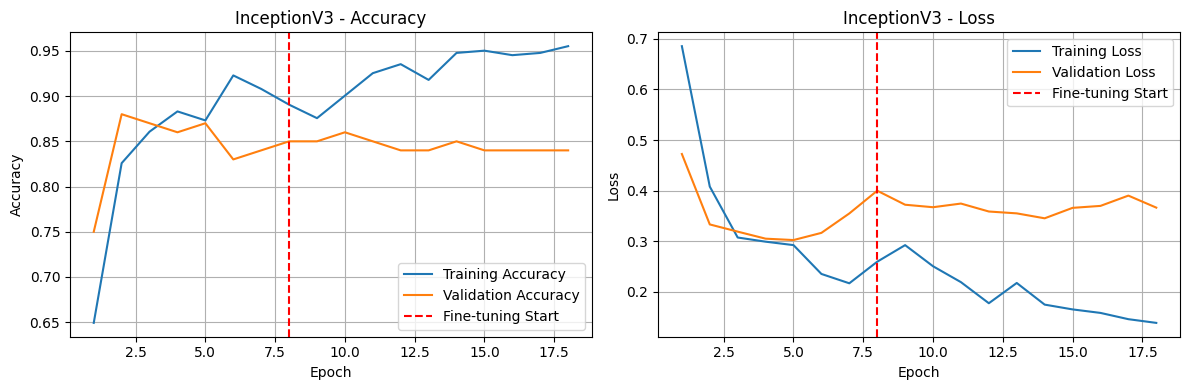


 InceptionV3 TRAINING COMPLETE!



In [1]:
# --------------------------------------
# MOUNT GOOGLE DRIVE
# --------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# --------------------------------------
# IMPORTS
# --------------------------------------
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os

# --------------------------------------
# DATA PATHS
# --------------------------------------
train_dir = '/content/drive/MyDrive/my_dataset1/my_dataset/train'
test_dir  = '/content/drive/MyDrive/my_dataset1/my_dataset/test'

# --------------------------------------
# DATA GENERATORS (WITH AUGMENTATION)
# --------------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 16
img_size = (224, 224)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# --------------------------------------
# BUILD INCEPTIONV3 MODEL
# --------------------------------------
from tensorflow.keras.applications import InceptionV3

print("\n============================")
print(" TRAINING : InceptionV3 MODEL")
print("============================\n")

base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False   # Train only last layers first

# Custom Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=preds)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --------------------------------------
# SAVE FOLDER
# --------------------------------------
save_folder = "/content/drive/MyDrive/models/InceptionV3"
os.makedirs(save_folder, exist_ok=True)

# --------------------------------------
# CHECKPOINT
# --------------------------------------
checkpoint = ModelCheckpoint(
    filepath=f"{save_folder}/model_inceptionv3.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# --------------------------------------
# PHASE 1 : TRAIN TOP LAYERS
# --------------------------------------
print("\n============================")
print(" PHASE 1 : Training Only Top Layers")
print("============================\n")

history1 = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=8,
    callbacks=[checkpoint]
)

# --------------------------------------
# PHASE 2 : FINE TUNING
# --------------------------------------
print("\n============================")
print(" PHASE 2 : Fine Tuning InceptionV3")
print("============================\n")

base_model.trainable = True

# Unfreeze last 50 layers
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history2 = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10,
    callbacks=[checkpoint]
)

# --------------------------------------
# SAVE FINAL MODEL
# --------------------------------------
model.save(f"{save_folder}/final_model.h5")

print("\n====================================")
print(" FINAL MODEL SAVED → final_model.h5")
print(" BEST MODEL SAVED → best_model.h5")
print("====================================\n")

# --------------------------------------
# EVALUATION
# --------------------------------------
print("\n============================")
print(" EVALUATING BEST MODEL")
print("============================\n")

best_model = tf.keras.models.load_model(f"{save_folder}/best_model.h5")
test_loss, test_acc = best_model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# --------------------------------------
# PLOT TRAINING HISTORY
# --------------------------------------
def plot_training_history(history1, history2):
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.axvline(x=8, color='red', linestyle='--', label='Fine-tuning Start')
    plt.title("InceptionV3 - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.axvline(x=8, color='red', linestyle='--', label='Fine-tuning Start')
    plt.title("InceptionV3 - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f"{save_folder}/training_history.png")
    plt.show()

plot_training_history(history1, history2)

print("\n===============================")
print(" InceptionV3 TRAINING COMPLETE!")
print("===============================\n")
